In [1]:
import time
import os.path
import requests
import pandas as pd

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune.denmune import DenMune

In [3]:
dataset = 'iris' # let us take iris dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"

dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
        
if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)       

using NGT, Proximity matrix has been calculated  in:  0.0021333694458007812  seconds
Dataset's Groundtruht


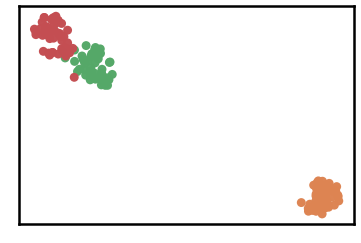



There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 40 clusters 



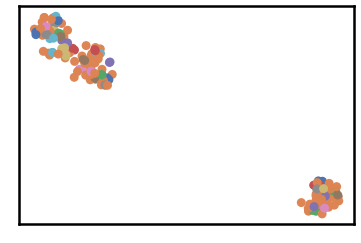

k= 1 :Validity score is: 0.14207650273224046 but best score is 0.14207650273224046 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0028417110443115234  seconds
k= 2 :Validity score is: 0.07894736842105263 but best score is 0.14207650273224046 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0013568401336669922  seconds
There are 11 outlier point(s) in black (noise of type-1) represent 7% of total points
There are 8 weak point(s) in light grey (noise of type-2) represent 5% of total points
DenMune detected 21 clusters 



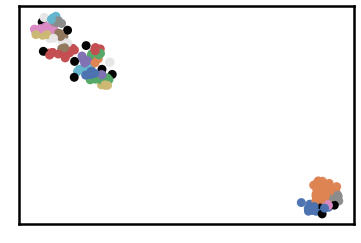

k= 3 :Validity score is: 0.36109706632509747 but best score is 0.36109706632509747 at k= 3     

using NGT, Proximity matrix has been calculated  in:  0.0024917125701904297  seconds
There are 5 outlier point(s) in black (noise of type-1) represent 3% of total points
There are 8 weak point(s) in light grey (noise of type-2) represent 5% of total points
DenMune detected 11 clusters 



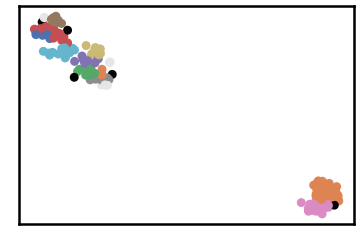

k= 4 :Validity score is: 0.5375816993464052 but best score is 0.5375816993464052 at k= 4     

using NGT, Proximity matrix has been calculated  in:  0.001508951187133789  seconds
There are 2 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 8 weak point(s) in light grey (noise of type-2) represent 5% of total points
DenMune detected 8 clusters 



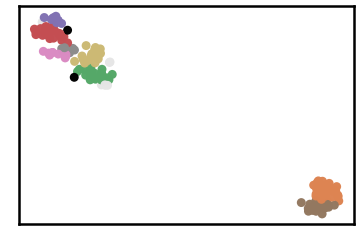

k= 5 :Validity score is: 0.6762618783166728 but best score is 0.6762618783166728 at k= 5     

using NGT, Proximity matrix has been calculated  in:  0.0023140907287597656  seconds
k= 6 :Validity score is: 0.6709876167132973 but best score is 0.6762618783166728 at k= 5     

using NGT, Proximity matrix has been calculated  in:  0.003234386444091797  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 5 clusters 



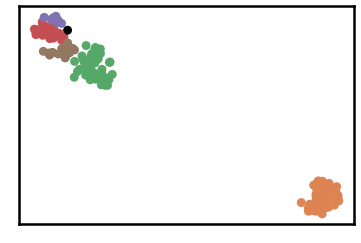

k= 7 :Validity score is: 0.8692774407060121 but best score is 0.8692774407060121 at k= 7     

using NGT, Proximity matrix has been calculated  in:  0.0026464462280273438  seconds
There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 4 clusters 



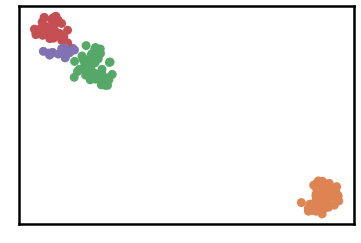

k= 8 :Validity score is: 0.9321309919316563 but best score is 0.9321309919316563 at k= 8     

using NGT, Proximity matrix has been calculated  in:  0.002469778060913086  seconds
k= 9 :Validity score is: 0.7858364693807731 but best score is 0.9321309919316563 at k= 8     

using NGT, Proximity matrix has been calculated  in:  0.0032727718353271484  seconds
k= 10 :Validity score is: 0.89769820971867 but best score is 0.9321309919316563 at k= 8     

using NGT, Proximity matrix has been calculated  in:  0.0018281936645507812  seconds
k= 11 :Validity score is: 0.89769820971867 but best score is 0.9321309919316563 at k= 8     

using NGT, Proximity matrix has been calculated  in:  0.003624439239501953  seconds
k= 12 :Validity score is: 0.89769820971867 but best score is 0.9321309919316563 at k= 8     

using NGT, Proximity matrix has been calculated  in:  0.0027077198028564453  seconds
k= 13 :Validity score is: 0.89769820971867 but best score is 0.9321309919316563 at k= 8     

using NGT, 

<Figure size 432x288 with 0 Axes>

In [4]:
# Denmune's Paramaters
# DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_plot=show_plot, show_noise=show_noise)
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

# loop's parameters
start = 1
step = 1
end=15

# Validity indexes' parameters
validity_val = -1
best_k = 0
best_val = -1

validity_idx = 2 # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])


for n in range(start, end+1, step):
    start_time = time.time()
    dm = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_noise=show_noise)
    labels_true, labels_pred = dm.output_Clusters()
    if show_plot == True and n==start:
        # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
        print ("Dataset\'s Groundtruht")
        dm.plot_clusters(labels_true, ground=True)
        print('\n', "=====" * 20 , '\n')       
               
    end_time = time.time()
    
    validity_indexes = dm.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end_time - start_time
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        # Let us show results where only an improve in accuracy is detected
        if show_plot:
            dm.plot_clusters(labels_pred, show_noise=show_noise)
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'at k=', best_k , end='     ')
            
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n', "=====" * 20 , '\n')

In [5]:
# It is time to save the results
results_path = 'results/'  # change it to whatever you output results to, set it to ''; so it will output to current folder
para_file = 'denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(results_path + para_file, index=False, sep='\t', header=True)

In [6]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
7,8.0,133.0,0.932131,0.841868,0.839116,0.842942,0.923649,0.773391,0.027127
9,10.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.034257
10,11.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.020218
11,12.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.022406
12,13.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.020512
13,14.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.022360
14,15.0,135.0,0.897698,0.797989,0.795421,0.745504,0.786923,0.809369,0.040403
6,7.0,121.0,0.869277,0.784554,0.778492,0.775061,0.922431,0.682535,0.028048
8,9.0,102.0,0.785836,0.699696,0.693196,0.619015,0.833488,0.602915,0.019808
4,5.0,77.0,0.676262,0.633626,0.617857,0.446222,0.928236,0.480971,0.016608
